# Fatal Police Shooting Project

For more information please refer to README.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import requests
%matplotlib inline

In [2]:
df = (pd.read_csv('database.csv')
      .drop('id', axis=1)
     )

In [3]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

# Data Cleaning

## Missing Values

In [5]:
pd.DataFrame(df.isna().any()).T

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,True,False,False,True,True,True,True,False,False,False,False,True,False


Name, armed, age, gender, race and flee columns seem to contain missing values

In [6]:
len(df[(df.name.isna()) | (df.armed.isna()) | (df.age.isna()) |
(df.gender.isna()) | (df.race.isna()) | (df.flee.isna())])

156

There are a total of 156 rows missing some kind of data.

In [7]:
df[df.race.isna()].head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,William Campbell,2015-01-25,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
241,John Marcell Allen,2015-03-30,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,Mark Smith,2015-04-09,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False
340,Joseph Roy,2015-05-07,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
398,James Anthony Morris,2015-05-31,shot,gun,40.0,M,NaN,Medford,OR,True,attack,Not fleeing,False


In [8]:
df[df.armed.isna()]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,Benjamin Peter Ashley,2015-08-15,shot,NaN,34.0,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,Jeffrey Smith,2016-07-28,shot,NaN,47.0,M,B,La Quinta,CA,False,other,Car,False
1715,Clayton Eugene Baker,2016-09-30,shot,NaN,38.0,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,Larry Daniel Matthews,2016-10-07,shot,NaN,57.0,M,B,Macon,GA,False,other,Not fleeing,False
1825,NaN,2016-11-11,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,Gilbert Zambronio-Lovato,2017-01-07,shot,NaN,38.0,M,H,Albuquerque,NM,False,other,Not fleeing,False


In [9]:
df[df.age.isna()].head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,Roger Albrecht,2015-08-29,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,Lawrence Price,2015-09-17,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,Jason Day,2015-10-12,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,John Tozzi,2015-10-24,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False


In [10]:
df[df.name.isna()].head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
928,NaN,2015-12-10,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False
1382,NaN,2016-05-26,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False
1385,NaN,2016-05-26,shot,knife,NaN,F,NaN,Sneads,FL,False,other,Not fleeing,False
1397,NaN,2016-06-01,shot,gun,NaN,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False
1419,NaN,2016-06-09,shot,baton,NaN,M,NaN,Somerton,AZ,False,attack,Not fleeing,False


There is no way to impute some of the missing data. Even the entries that have no name, race or age features are still valuable to the analysis since they contain other useful variables such as geographical location, therefore should be kept.

## Duplicates

In [11]:
duplicates = df[(df.name.duplicated()) & (df.name.notna())]
duplicates

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1093,Eric Harris,2016-02-08,shot,vehicle,22.0,M,B,New Orleans,LA,False,other,Car,False
1398,Michael Johnson,2016-06-01,shot,gun,21.0,M,B,Newnan,GA,False,attack,Foot,True
1780,Brandon Jones,2016-10-25,shot,toy weapon,25.0,M,W,Elkton,MD,True,attack,Not fleeing,False
1934,Daquan Antonio Westbrook,2016-12-24,shot,gun,18.0,M,B,Charlotte,NC,False,undetermined,Not fleeing,False
2053,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,B,Rowland,NC,False,attack,Car,False


In [12]:
df[df.name.isin(duplicates.name)]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
209,Brandon Jones,2015-03-19,shot,unarmed,18.0,M,B,Cleveland,OH,False,attack,Not fleeing,False
249,Eric Harris,2015-04-02,shot,unarmed,44.0,M,B,Tulsa,OK,False,other,Not fleeing,False
976,Daquan Antonio Westbrook,2015-12-24,shot,gun,18.0,M,B,Charlotte,NC,False,attack,Not fleeing,False
1093,Eric Harris,2016-02-08,shot,vehicle,22.0,M,B,New Orleans,LA,False,other,Car,False
1342,Michael Johnson,2016-05-09,shot,gun,26.0,M,W,Chicago,IL,False,other,Foot,False
1398,Michael Johnson,2016-06-01,shot,gun,21.0,M,B,Newnan,GA,False,attack,Foot,True
1780,Brandon Jones,2016-10-25,shot,toy weapon,25.0,M,W,Elkton,MD,True,attack,Not fleeing,False
1934,Daquan Antonio Westbrook,2016-12-24,shot,gun,18.0,M,B,Charlotte,NC,False,undetermined,Not fleeing,False
2049,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,B,Rowland,NC,False,attack,Car,False
2053,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,B,Rowland,NC,False,attack,Car,False


Entries Jamake Cason Thomas and Daquan Antonio Westbrook seem to be truly duplicated. Index 1934 and 2053 to be dropped.

In [13]:
df.drop([1934, 2053], inplace=True)

## Outliers

Age is the only numerical variable in this data set.

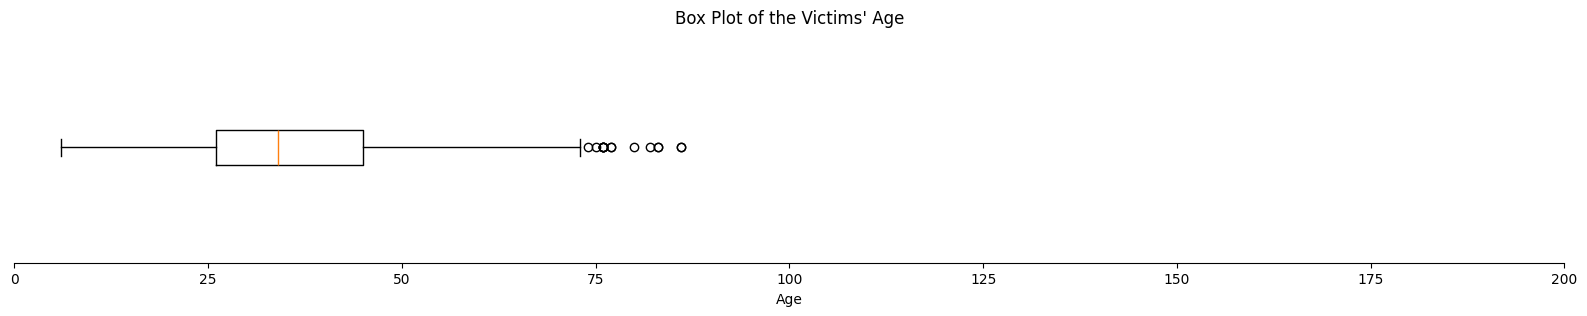

In [14]:
not_na_age = df[df.age.notna()]['age']
fig, ax = plt.subplots(figsize=(20,3))
ax.boxplot(not_na_age, vert=False)
ax.set_xlim(xmin=0, xmax=200)
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_xlabel('Age')
ax.set_title("Box Plot of the Victims' Age");

It seem's that there are surprisingly a lot especially older but also very young people amongs the age distribution.

In [15]:
df.sort_values('age', ascending=False).head(5)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1675,Eugene Craig,2016-09-12,shot,gun,86.0,M,NaN,Saratoga,CA,False,other,Not fleeing,False
426,Raymond Phillips,2015-06-11,shot,gun,86.0,M,NaN,Columbia,TN,True,attack,Not fleeing,False
275,Richard Dale Weaver,2015-04-12,shot,machete,83.0,M,W,Oklahoma City,OK,True,other,Not fleeing,False
1878,Quinton Phillips,2016-12-01,shot,gun,83.0,M,W,Dover,AR,False,attack,Not fleeing,False
1631,Darrel Hetrick,2016-08-27,shot,gun,82.0,M,W,Morgantown,WV,False,attack,Not fleeing,True


In [16]:
df.sort_values('age').head(5)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
830,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True
1014,Ciara Meyer,2016-01-11,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,Not fleeing,False
1678,Tyre King,2016-09-14,shot,toy weapon,13.0,M,B,Columbus,OH,False,other,Foot,False
1585,Jesse James Romero,2016-08-09,shot,gun,14.0,M,H,Los Angeles,CA,False,attack,Foot,True
1845,Luke Smith,2016-11-19,shot and Tasered,knife,15.0,M,A,Watsonville,CA,False,other,Foot,True


Looking up on the internet these seem to be legitimate shooting victims.

# EDA

## Fatal Shootings per Year

In [17]:
df['year'] = df.date.dt.year

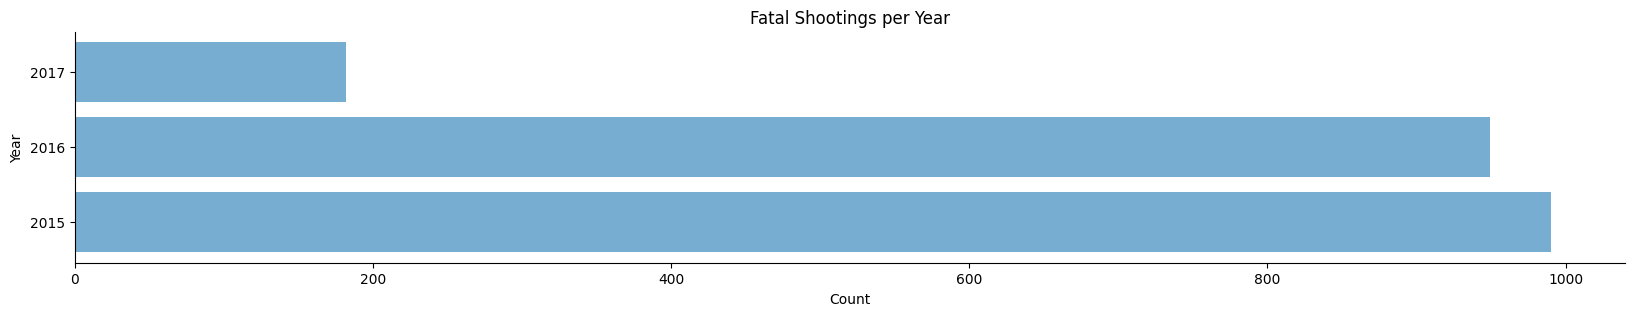

In [18]:
shootings_per_year = df.groupby('year')['name'].count()
fig, ax = plt.subplots(figsize=(20,3))
ax.barh(['2015', '2016', '2017'], shootings_per_year, alpha=0.6)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Count')
ax.set_ylabel('Year')
ax.set_title('Fatal Shootings per Year');


In [19]:
df[df['date'] >= '2017'].head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
1954,John McLaughlin,2017-01-01,shot,gun,42.0,M,W,Springfield,OH,False,other,Not fleeing,False,2017
1955,Trevon Johnson,2017-01-01,shot,knife,17.0,M,B,Villa Park,IL,False,undetermined,NaN,False,2017
1956,James E. Lewis,2017-01-01,shot and Tasered,gun,44.0,M,B,Springfield,MO,True,attack,Not fleeing,False,2017
1957,Chad Erik Roberts,2017-01-01,shot,gun,35.0,M,W,Woodstock,GA,False,attack,Car,False,2017
1958,Juan Carlos Cuadra,2017-01-01,shot,gun,23.0,M,H,Houston,TX,False,attack,Foot,False,2017


In [20]:
df.date.max()

Timestamp('2017-02-28 00:00:00')

Data collection stops at February 28 for 2017. The previous two years have a similar number of fatal shootings approaching 1000 a year.

## Fatal Shootings for Days of the Week

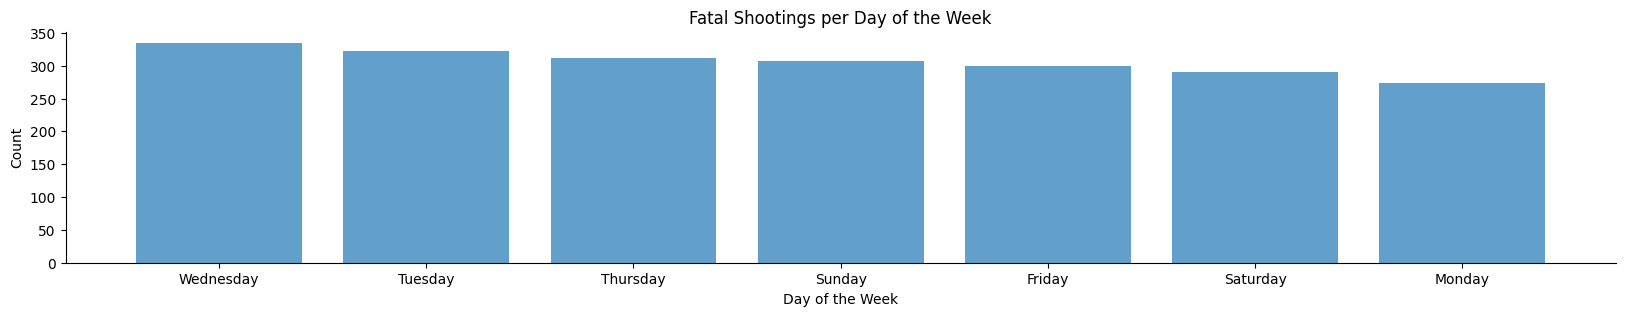

In [21]:
df['day_of_week'] = df.date.dt.day_name()

fig, ax = plt.subplots(figsize=(20,3))
ax.bar(df.day_of_week.value_counts().index,
 df.day_of_week.value_counts(), alpha=0.7)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')
ax.set_title('Fatal Shootings per Day of the Week');

There seem to be a split between midweek days and weekend and days around weekend. Slight differences in distributions but probably no significance there. 

## Days of the Week Yearly Analysis

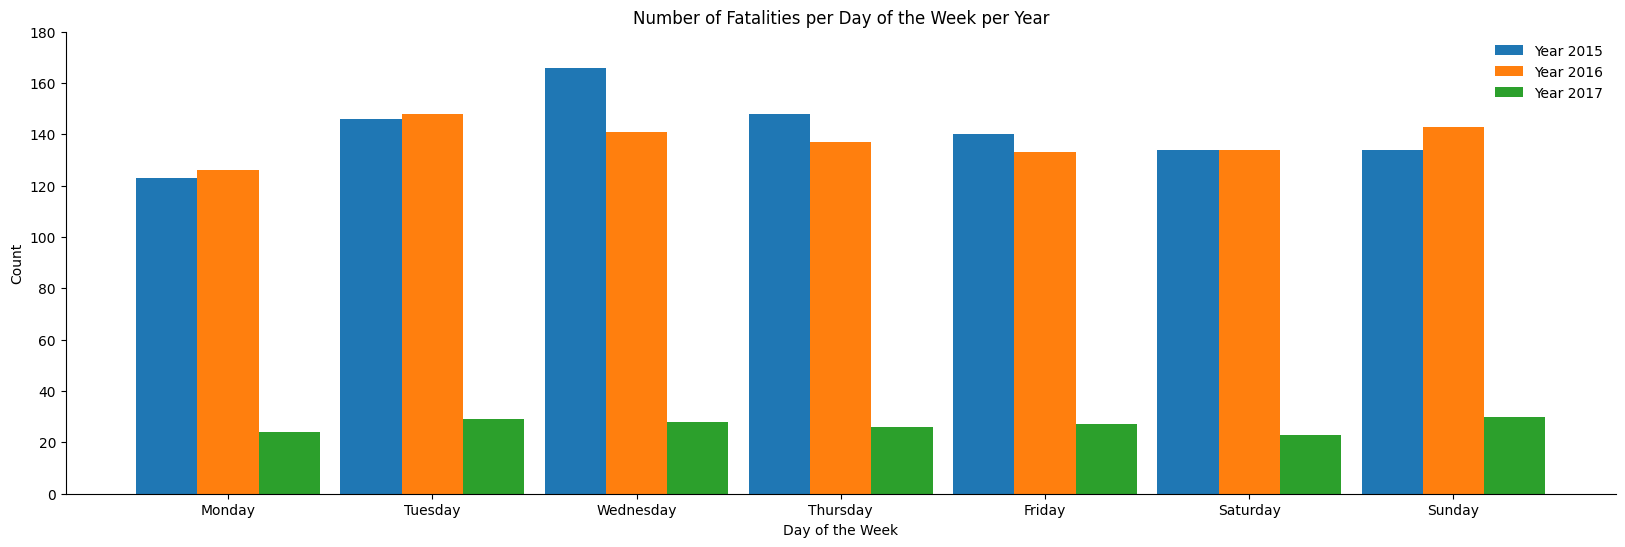

In [22]:
yearly_day_of_week = df.groupby('year').day_of_week.value_counts()
fig, ax = plt.subplots(figsize=(20,6))
for i in range(3): 
    ax.bar(np.arange(7) + i*0.3, yearly_day_of_week[2015 + i][
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], width = 0.3, label=f'Year {2015 + i}')
ax.legend(frameon=False)
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylim(0, 180)
ax.set_title('Number of Fatalities per Day of the Week per Year')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(7) + 0.3)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

Wednesday and Tuesday seem to have the most frequency, though the relationship is likely spurious. It's very hard to establish anything causal here, however one would usually expect the crime rate to rise during the weekend and therefore the fatalities of police shootings to rise while they don't.

## Monthly Fatal Shootings

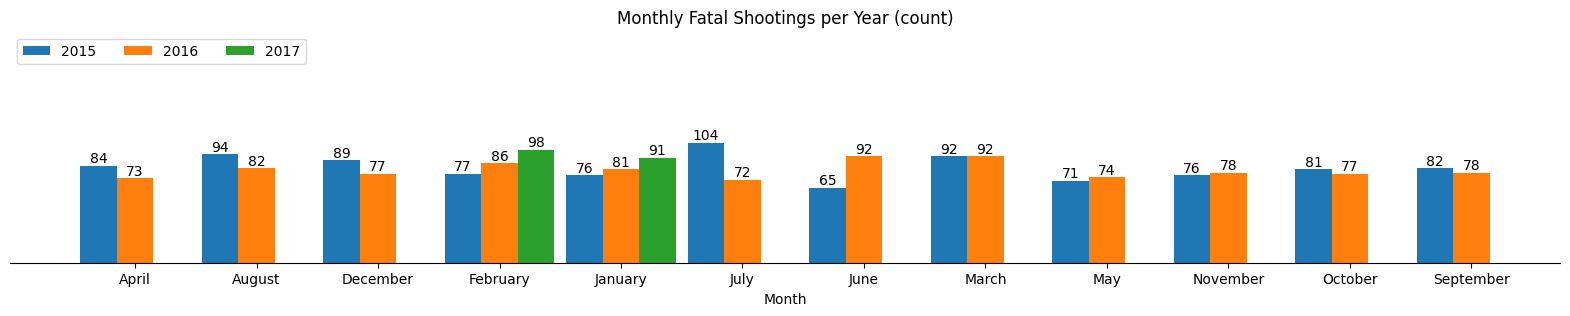

In [23]:
df['month'] = df.date.dt.month_name()
monthly_fatal = (df
 .groupby(['year', 'month'])
 .date
 .count()                
)

fig, ax = plt.subplots(figsize=(20,3))
ind = np.arange(12)
for index in range(2):
    container = ax.bar(ind + (0.3 * index),
    monthly_fatal[2015 + index].values, width = 0.3, label=str(2015 + index))
    ax.bar_label(container) 
container = ax.bar(np.arange(12) + 0.6, [np.nan, np.nan, np.nan,
98, 91, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan], width = 0.3, label=str(2017))
ax.bar_label(container)  
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.set_ylim(0, 200)
ax.legend(loc='upper left', ncols=3)
ax.set_xticks(ind + 0.3)
ax.set_xticklabels(monthly_fatal.index.get_level_values(1)[:12])
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_title('Monthly Fatal Shootings per Year (count)')
ax.set_xlabel('Month');

July 2015 seems interesting to examine further. Perhaps there could be a trend indicative of some event or a pattern.

In [24]:
july_2015 = df[(df.month == 'July') & (df.year == 2015)]

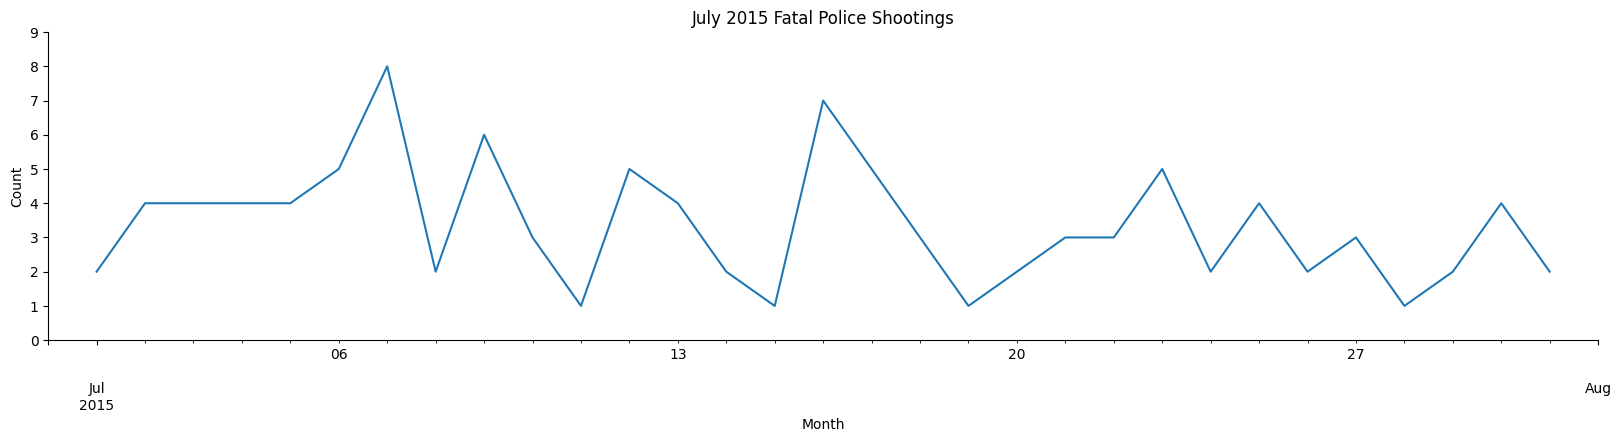

In [25]:
july_2015_counts = july_2015.groupby('date').date.count()
july_2015_counts.plot(figsize=(20,4))
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlim('2015-06-30', '2015-08-01')
ax.set_ylim(0, 9)
ax.set_title('July 2015 Fatal Police Shootings')
ax.set_xlabel('Month')
ax.set_ylabel('Count');

There seem to big upticks on specific days in the first half of the monts.

In [26]:
pd.DataFrame(july_2015_counts.sort_values(ascending=False)).head()

,date
date,
2015-07-07,8
2015-07-16,7
2015-07-09,6
2015-07-17,5
2015-07-23,5


In [27]:
spikes = df[(df.date == '2015-07-07')
| (df.date == '2015-07-16') 
| (df.date == '2015-07-09')
| (df.date == '2015-07-17') 
| (df.date == '2015-07-23')]
spikes.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,day_of_week,month
488,Marcellus Jamarcus Burley,2015-07-07,shot,gun,18.0,M,B,Houston,TX,False,attack,Not fleeing,False,2015,Tuesday,July
489,Adam Dujanovic,2015-07-07,shot,metal pole,33.0,M,W,Mesa,AZ,False,other,Not fleeing,False,2015,Tuesday,July
490,Joe Cody,2015-07-07,shot,gun,59.0,M,W,Dallas,TX,False,attack,Not fleeing,False,2015,Tuesday,July
491,Daniel Hernandez,2015-07-07,shot,gun,47.0,M,H,Bakersfield,CA,False,attack,Not fleeing,False,2015,Tuesday,July
492,Jose Graciano Lopez,2015-07-07,shot,gun,39.0,M,H,Edinburg,TX,True,attack,Not fleeing,False,2015,Tuesday,July


No relation found.

## Merging in Demographics Data

In [28]:
county_facts = pd.read_csv('county_facts.csv')
county_facts_dictionary = pd.read_csv('county_facts_dictionary.csv')

new_columns = list() 
for name in county_facts.columns:
    if not name in county_facts_dictionary.column_name.values:
        new_columns.append(name)
    else:
        new_columns.append(county_facts_dictionary
        [county_facts_dictionary.column_name == name]['description'].values[0])

county_facts.columns = new_columns

target_columns = ["area_name", "state_abbreviation",
                  "Black or African American alone, percent, 2014", 
                  "Population, 2014 estimate",
                  "Asian alone, percent, 2014", 
                  "White alone, not Hispanic or Latino, percent, 2014",
                  'Hispanic or Latino, percent, 2014']

area_data = county_facts[target_columns]
area_data.columns = ['area_name', 'state_abbreviation',
                     'black_percent', 'population', 'asian_percent', 'white_percent', 'hispanic_percent']
states_only = area_data[area_data['state_abbreviation'].isna()][1:].drop('state_abbreviation', axis=1)

states = pd.read_csv('states.csv')
states.iloc[8,0] = 'District Of Columbia'
states_final = pd.merge(states_only, states, left_on='area_name', right_on='State').drop('area_name', axis=1)

df = pd.merge(df, states_final, left_on='state', right_on='Abbreviation', how='left')
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,year,day_of_week,month,black_percent,population,asian_percent,white_percent,hispanic_percent,State,Abbreviation
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,...,2015,Friday,January,4.1,7061530,8.2,70.4,12.2,Washington,WA
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,...,2015,Friday,January,2.0,3970239,4.3,77.0,12.5,Oregon,OR
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,...,2015,Saturday,January,6.3,2904021,2.8,76.8,11.4,Kansas,KS
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,...,2015,Sunday,January,6.5,38802500,14.4,38.5,38.6,California,CA
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,...,2015,Sunday,January,4.5,5355866,3.1,69.0,21.2,Colorado,CO


# The Racial Picture of Police Shootings

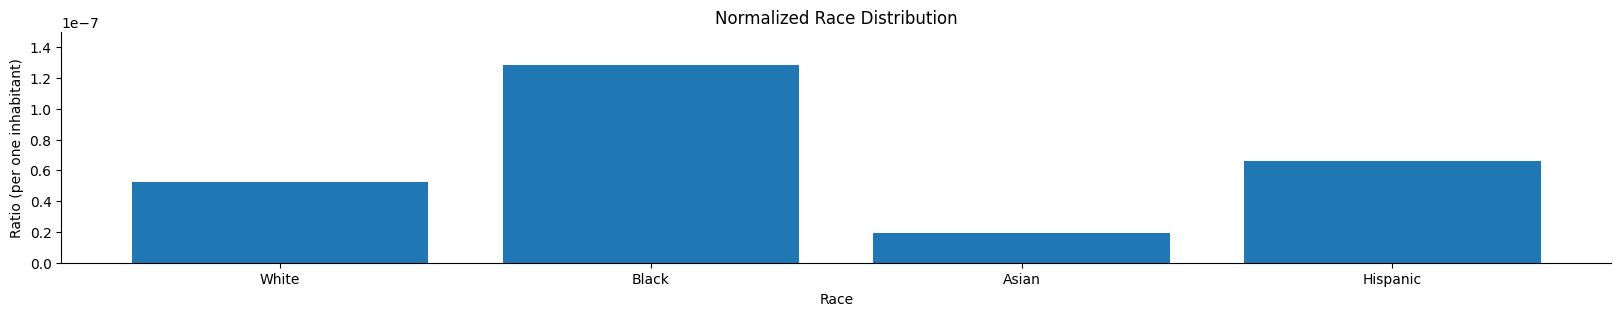

In [29]:
pop = county_facts.iloc[0,3]
pop_by_race = county_facts.iloc[0].loc[['White alone, not Hispanic or Latino, percent, 2014',
'Black or African American alone, percent, 2014',
'Asian alone, percent, 2014',
'Hispanic or Latino, percent, 2014']] * pop
pop_by_race.index = ['White', 'Black', 'Asian', 'Hispanic']
pop_by_race = pop_by_race.apply(lambda x: round(x))
race_normalized = df.groupby('race').date.count().loc[['W', 'B', 'A', 'H']].values / pop_by_race.values

fig, ax = plt.subplots(figsize=(20,3))
ax.bar(pop_by_race.index, race_normalized)
ax.set_ylim(0, 1.5E-7)
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Normalized Race Distribution')
ax.set_ylabel('Ratio (per one inhabitant)')
ax.set_xlabel('Race');

The black population is over-represented nearly two-fold compared to White and Hispanic populations in this sample. The asian population seems to be least represented.

# Shootings per State

In [30]:
shootings_per_state = pd.DataFrame(df.groupby('state').date.count()).reset_index()
shootings_per_state.columns = ['state', 'count']
shootings_per_state.head()

,state,count
0,AK,12
1,AL,44
2,AR,21
3,AZ,95
4,CA,355


In [31]:
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()


def plot_us(data, cols, leg):

    m = folium.Map(location=[48, -102], zoom_start=3)
    folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=data,
    columns=cols,
    key_on="feature.id",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=leg,
    ).add_to(m)

    folium.LayerControl().add_to(m)

    return m


plot_us(shootings_per_state, ["state", "count"], "Total number of shootings(Jan 2015 to Feb 2017)")

We see that by far the worst state in terms of total number of shootings is California followed by Texas.

# Shootings per State Normalized by Population

In [32]:
st_pops = df.groupby('state').population.first().reset_index()
shootings_per_state_pop = pd.merge(shootings_per_state, st_pops, on='state')
shootings_per_state_pop['sp_ratio'] = shootings_per_state_pop['count'] / shootings_per_state_pop['population']
shootings_per_state_pop.head()

,state,count,population,sp_ratio
0,AK,12,736732,0.000016
1,AL,44,4849377,0.000009
2,AR,21,2966369,0.000007
3,AZ,95,6731484,0.000014
4,CA,355,38802500,0.000009


In [33]:
plot_us(shootings_per_state_pop, ['state', 'sp_ratio'], 'Fatal Police Shootings Normalized by State Population')

New Mexico, Alaska, Arizona, West Virginia, Nevada, Wyoming, Colorado, Oklahoma. Are the most affected states per population. While North Dakota, Iowa, Illinois, Michigan, Pennsylvania, Washington, New York, Vertmont, Connecticut and Massachusets are least affected.

## Police Shootings Normalized by City Population

In [34]:
city_data = pd.read_csv('uscities.csv')
city_pop = city_data[['city', 'state_id', 'population', 'county_fips']]
city_pop.head()

,city,state_id,population,county_fips
0,New York,NY,18713220,36061
1,Los Angeles,CA,12750807,6037
2,Chicago,IL,8604203,17031
3,Miami,FL,6445545,12086
4,Dallas,TX,5743938,48113


In [35]:
city_df = pd.merge(df, city_pop, left_on=['city', 'Abbreviation'], right_on=['city', 'state_id'], suffixes=('_state', '_city'))
city_df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,black_percent,population_state,asian_percent,white_percent,hispanic_percent,State,Abbreviation,state_id,population_city,county_fips
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,...,4.1,7061530,8.2,70.4,12.2,Washington,WA,WA,20264,53045
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,...,2.0,3970239,4.3,77.0,12.5,Oregon,OR,OR,54287,41067
2,Phyllis Ilene Jepsen,2015-10-02,shot,knife,55.0,F,W,Aloha,OR,True,...,2.0,3970239,4.3,77.0,12.5,Oregon,OR,OR,54287,41067
3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,...,6.3,2904021,2.8,76.8,11.4,Kansas,KS,KS,482249,20173
4,Nicholas Garner,2015-08-22,shot,vehicle,26.0,M,W,Wichita,KS,False,...,6.3,2904021,2.8,76.8,11.4,Kansas,KS,KS,482249,20173


Some rows got lost on merging but since those are mostly small towns or wrong area denominations(eg. Counties) the general trends are unlikely to be changed.

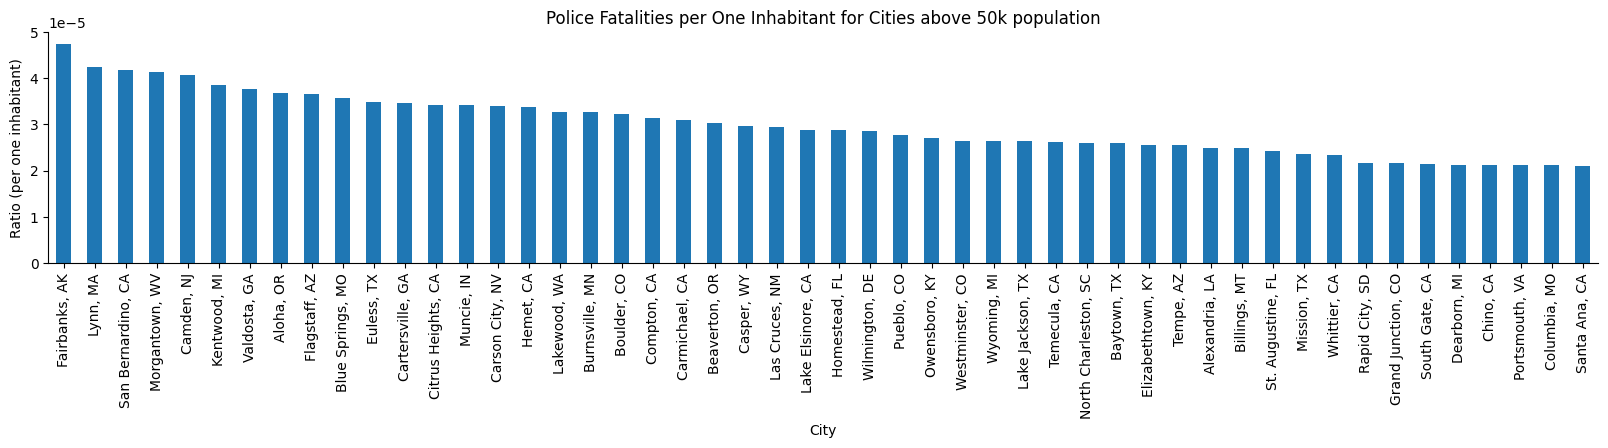

In [36]:
city_cpp = city_df.groupby(['city', 'state']).date.count().reset_index()
city_cpp['population'] = city_df.groupby(['city', 'state']).population_city.first().values
city_cpp.columns=['city', 'state', 'count', 'population']
city_cpp['sp_pop_norm'] = city_cpp['count'] / city_cpp['population']
city_cpp['tick'] = city_cpp.apply(lambda x: f"{x['city']}, {x['state']}", axis=1)
city_cpp.sort_values('sp_pop_norm', ascending=False, inplace=True)

city_cpp[city_cpp['population'] >= 50_000].head(50).plot(
    'tick', 'sp_pop_norm', kind='bar', figsize=(20,3), ylim=[0, 5E-5],
    legend=False, xlabel='City', ylabel='Ratio (per one inhabitant)', title='Police Fatalities per One Inhabitant for Cities above 50k population')
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False);

Fairbanks Arkansas has the most shootings per inhabitant followed by Lynn Massachusets and San Bernardino California. 

## Gender Distribution

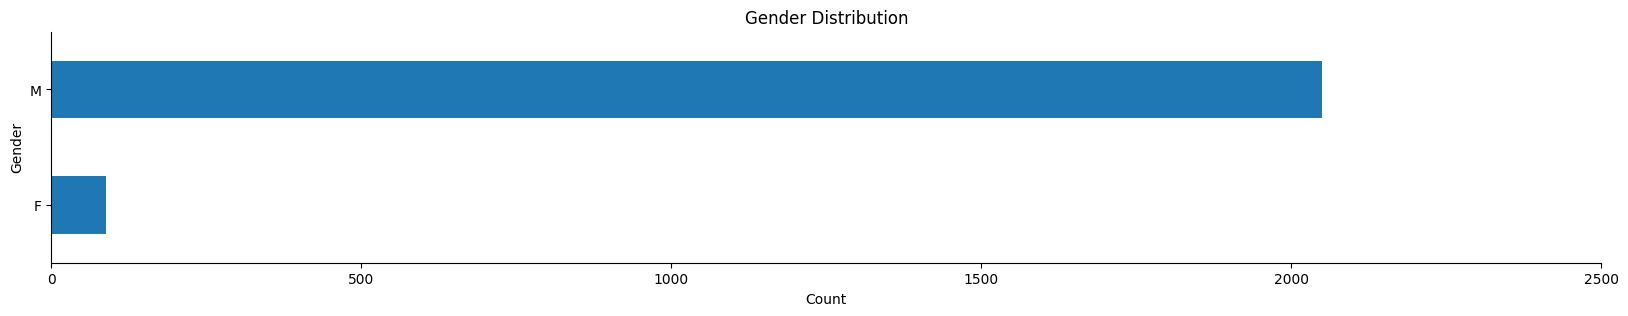

In [37]:
(
    df.groupby('gender')
    .gender
    .count()
    .plot(kind='barh', figsize=(20, 3),
    xlim=(0, 2500), title='Gender Distribution',
    xlabel='Count', ylabel='Gender')
)
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False);

## Gender and Race

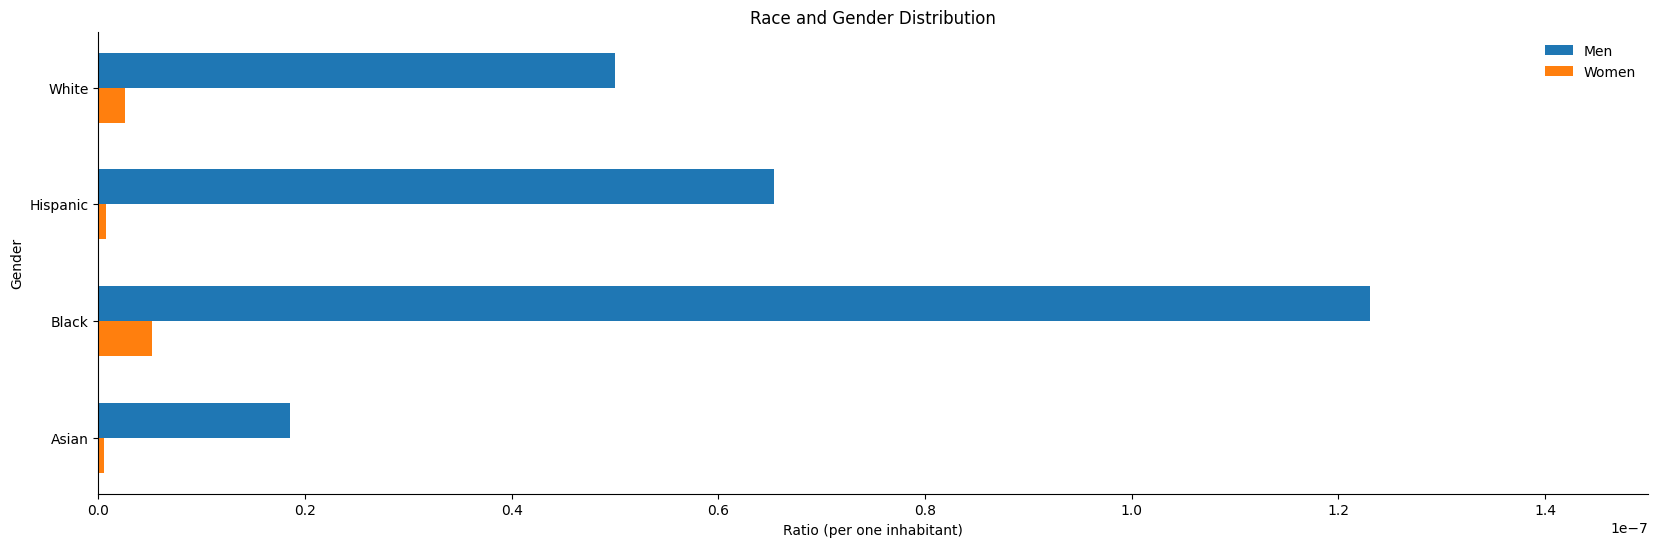

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
gender_race = df.groupby(['race', 'gender']).gender.count()
women_norm = gender_race[['A', 'B', 'H', 'W']][:,'F'] / pop_by_race[['Asian', 'Black', 'Hispanic', 'White']].values
men_norm = gender_race[['A', 'B', 'H', 'W']][:,'M'] / pop_by_race[['Asian', 'Black', 'Hispanic', 'White']].values

ax.barh(np.arange(4) + 0.3, men_norm, height=0.3, label='Men')
ax.barh(np.arange(4), women_norm, height=0.3, label='Women')
ax.set_yticks(np.arange(4) + 0.15)
ax.set_yticklabels(['Asian', 'Black', 'Hispanic', 'White'])
ax.legend(frameon=False)
ax.set_xlim(0, 1.5E-7)
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Race and Gender Distribution')
ax.set_ylabel('Gender')
ax.set_xlabel('Ratio (per one inhabitant)');

Men are dominant in all racial subdivisions. Black women seem to be the most targeted group among women, however the sample size of women is small overall therefore, it's difficult to say to the significance of it. Interestingly, hispanic women are scarsely represented, in fact, much so than white women while hispanic men are much more represented than white men.

## Mental Illness

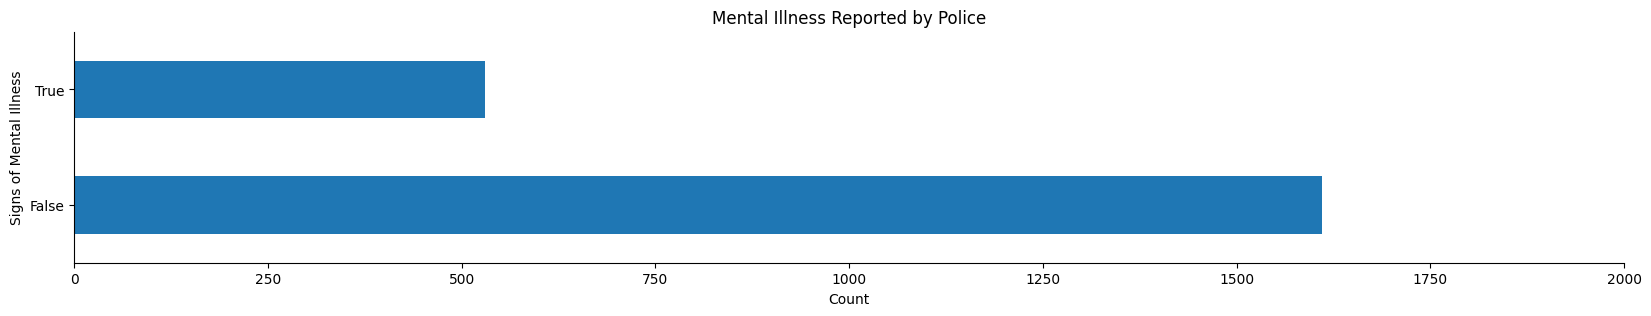

In [39]:
(
    df
    .signs_of_mental_illness
    .value_counts()
    .plot(
    kind='barh', figsize=(20,3),
    xlim=(0,2000),
    ylabel='Signs of Mental Illness',
    xlabel='Count',
    title='Mental Illness Reported by Police')
)
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False);

Police reported signs of mental illness for around one fourth of the total fatal shooting cases.

## Mental Illnesses and Race

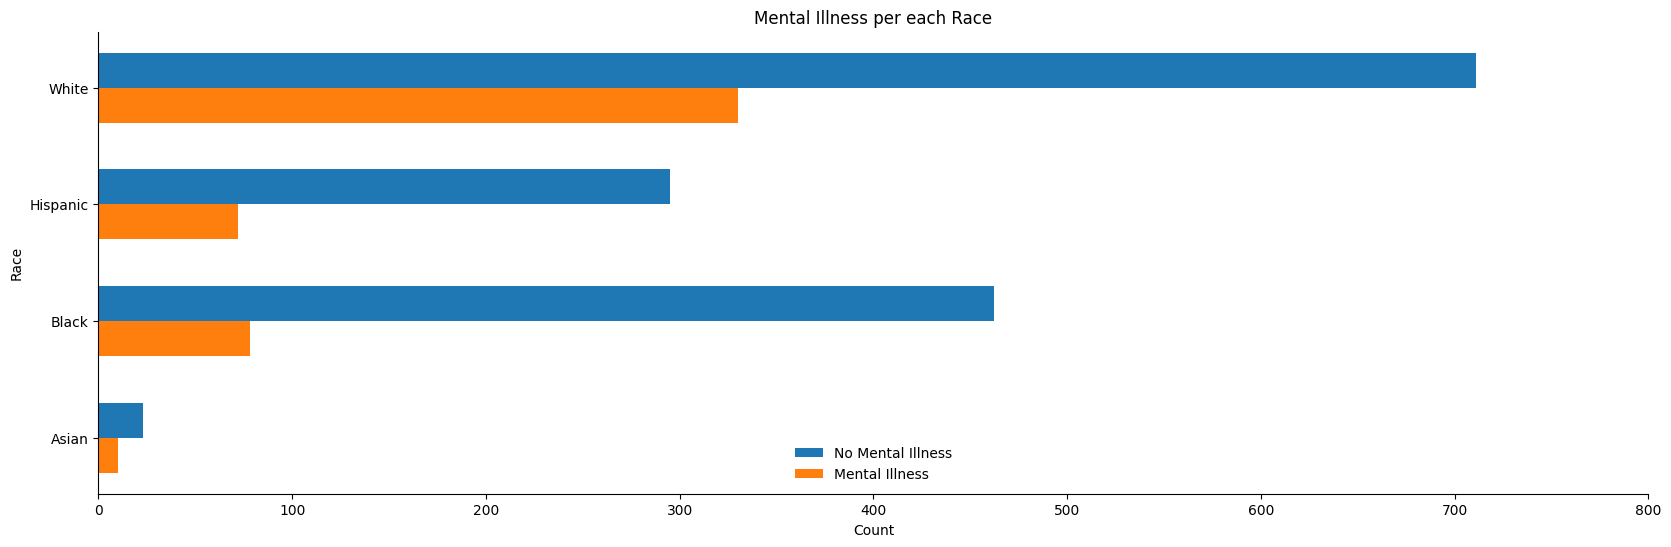

In [40]:
race_mental = df.groupby('race').signs_of_mental_illness.value_counts()
no_illness = race_mental[:, False]
illness = race_mental[:, True]
fig, ax = plt.subplots(figsize=(20,6))
ax.barh(np.arange(4) + 0.3, no_illness[['A', 'B', 'H', 'W']], height=0.3, label='No Mental Illness')
ax.barh(np.arange(4), illness[['A', 'B', 'H', 'W']], height=0.3, label='Mental Illness')
ax.legend(loc='lower center', frameon=False)
ax.set_yticks(np.arange(4) + 0.15)
ax.set_yticklabels(['Asian', 'Black', 'Hispanic', 'White'])
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlim(0,800)
ax.set_title('Mental Illness per each Race')
ax.set_ylabel('Race')
ax.set_xlabel('Count');

Overwhelming amount of mental illness reports fall within the white population. The fraction of mental illness reports are much higher among white population as opposed to other populations, with a possible exception of asians. Though, the asian population in this sample is relatively very small.

## Fatal Police Shootings and Being Armed

In [41]:
print(df.armed.unique())

['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'vehicle' 'shovel'
 'hammer' 'hatchet' 'undetermined' 'sword' 'machete' 'box cutter'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'metal pole' 'Taser'
 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' nan 'carjack' 'chain' "contractor's level"
 'unknown weapon' 'stapler' 'beer bottle' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe' 'flashlight' 'baton' 'spear' 'pitchfork'
 'hatchet and gun' 'rock' 'piece of wood' 'bayonet' 'pipe' 'glass shard'
 'motorcycle' 'metal rake' 'crowbar' 'oar' 'machete and gun' 'tire iron'
 'pole and knife']


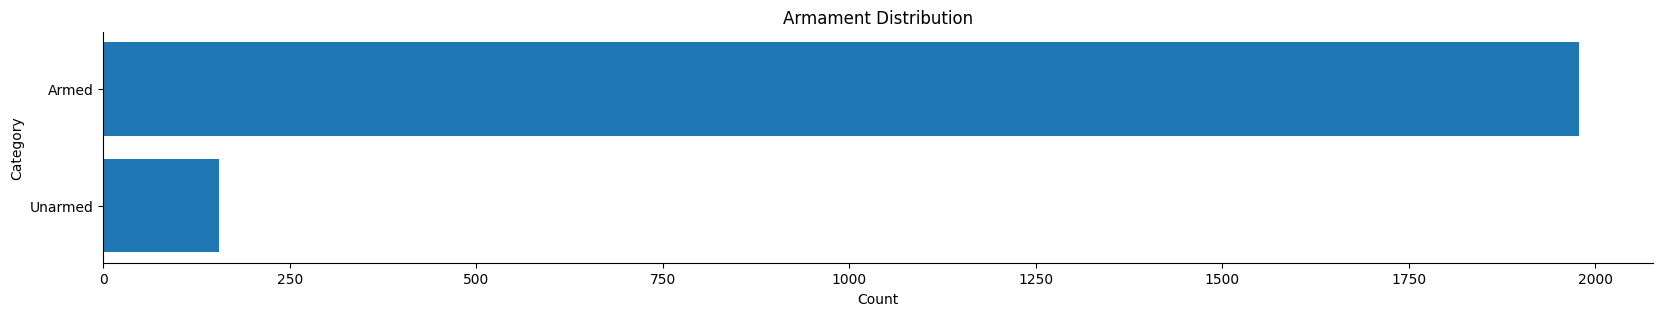

In [42]:
fig, ax = plt.subplots(figsize=(20,3))
ax.barh(['Unarmed', 'Armed'],
       [df.armed.value_counts()['unarmed'],
        df.armed.value_counts()
        [[i for i in df.armed.dropna().unique() if i != 'unarmed']].sum()])
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Armament Distribution')
ax.set_ylabel('Category')
ax.set_xlabel('Count');


In overwhelming majority of the cases the civilian was armed.

## Armed by Weapon Category

Based on the armed column it's posible to derive and aggregate the cases into a few categories: shooting weapons and explosives, cold weapons, vehicles, undetermined and
weapons that could be confused with firearms.

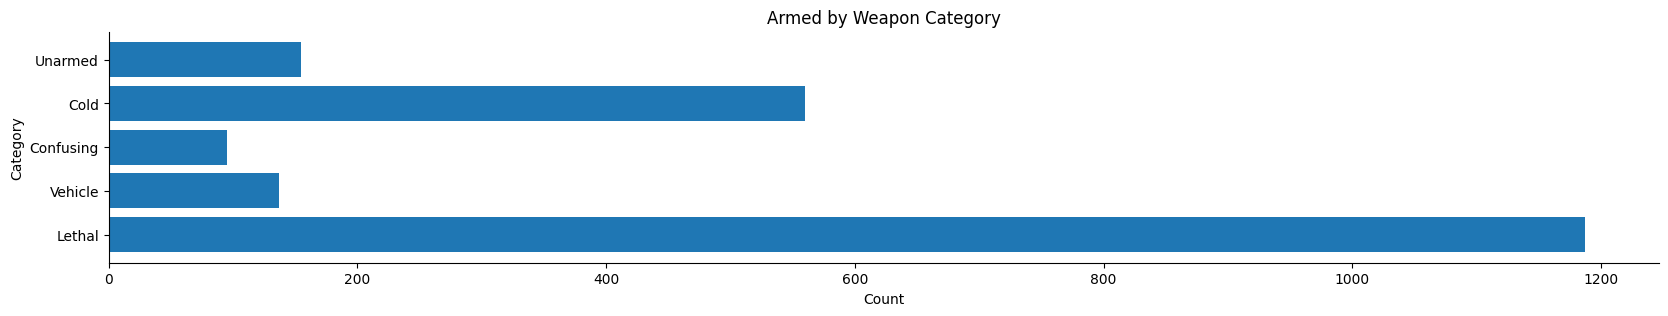

In [43]:
lethal = df[df.armed.isin(['gun', 'guns and explosives', 'crossbow',
'bean-bag gun', 'gun and knife', 'hatchet and gun', 'bayonet', 'machete and gun'])]
vehicle = df[df.armed.isin(['vehicle', 'motorcycle'])]
confusing = df[df.armed.isin(['toy weapon', 'nail gun', 'taser', 'flashlight', 'hand torch'])]
unarmed = df[df.armed.isin(['unarmed'])]
cold = df[np.invert(df.index.isin(np.concatenate(
    [lethal.index, vehicle.index, confusing.index, unarmed.index])))].dropna(subset=['armed'])

fig, ax = plt.subplots(figsize=(20,3))
ax.barh(['Lethal', 'Vehicle','Confusing', 'Cold', 'Unarmed'],
       [lethal.armed.count(), vehicle.armed.count(), confusing.armed.count(),
       cold.armed.count(), unarmed.armed.count()])
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Armed by Weapon Category')
ax.set_ylabel('Category')
ax.set_xlabel('Count');

## Weapon Category Prevalence by Race

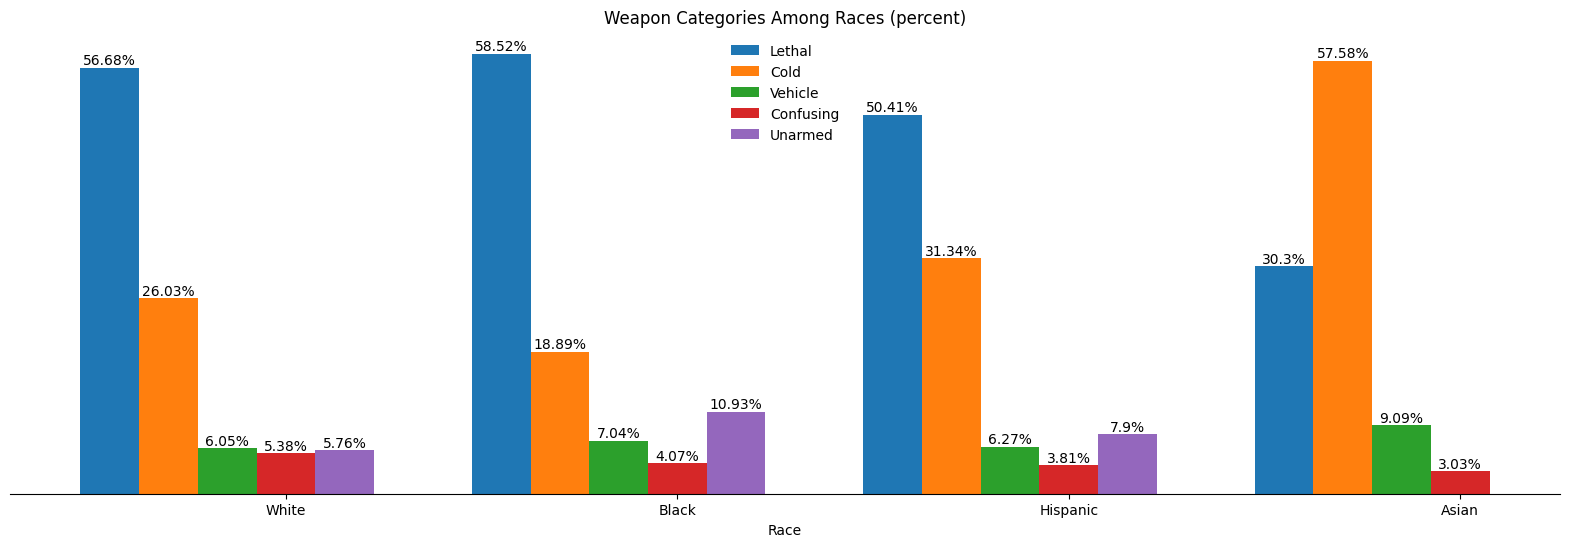

In [59]:
def percentage(x):
    return np.round((x
     .race
     .dropna()
     .value_counts()
     .divide(
         (df
          .race
          .dropna()
          .value_counts()
         )))
    [['W', 'B', 'H', 'A']]
    .multiply(100),
    2
)
    
fig, ax = plt.subplots(figsize=(20,6))
pos = np.arange(4)
containers = [ax.bar(pos, percentage(lethal), width=0.15, label='Lethal'),
ax.bar(pos + 0.15, percentage(cold), width=0.15, label='Cold'),
ax.bar(pos + 0.3, percentage(vehicle), width=0.15, label='Vehicle'),
ax.bar(pos + 0.45, percentage(confusing), width=0.15, label='Confusing'),
ax.bar(pos + 0.6, percentage(unarmed), width=0.15, label='Unarmed')]
for container in containers:
    ax.bar_label(container, fmt='{}%')
plt.legend(frameon=False)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_xticks(pos + 0.45)
ax.set_xticklabels(['White', 'Black', 'Hispanic', 'Asian'])
ax.set_title('Weapon Categories Among Races (percent)')
ax.set_xlabel('Race')
ax.spines[['top', 'right', 'left']].set_visible(False);

# Age

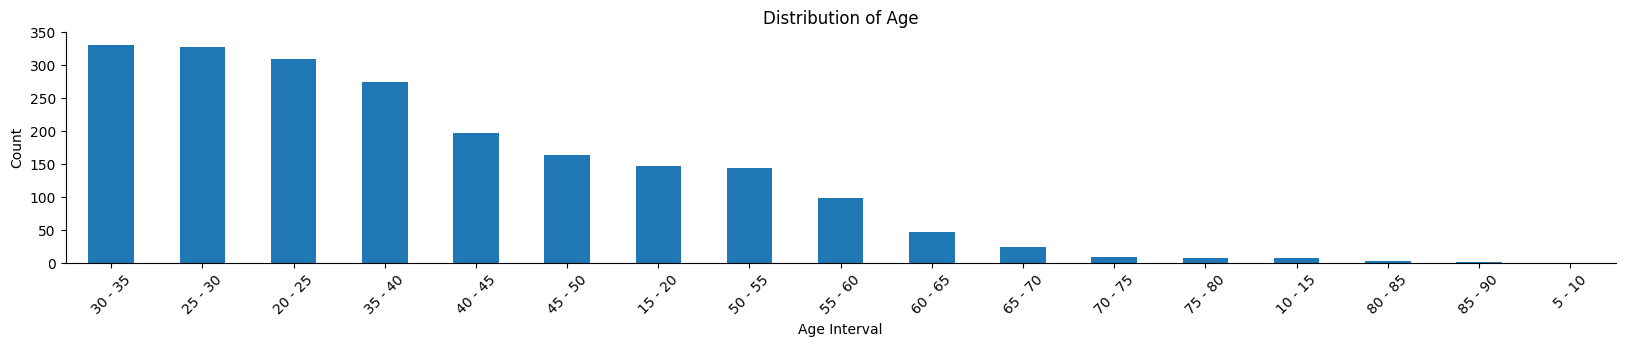

In [61]:
df['age_bin'] = (pd.cut(df.age.dropna(), np.linspace(0, 100, 21)[1:-1].astype(int))
.astype('str')
.str.strip('(]')
.str.replace(', ', ' - ')
                )

df['age_bin'].value_counts().plot(kind='bar',
                                  figsize=(20,3), rot=45, xlabel='Age Interval',
                                  ylabel='Count', title='Distribution of Age')
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylim(0, 350);

# Fleeing

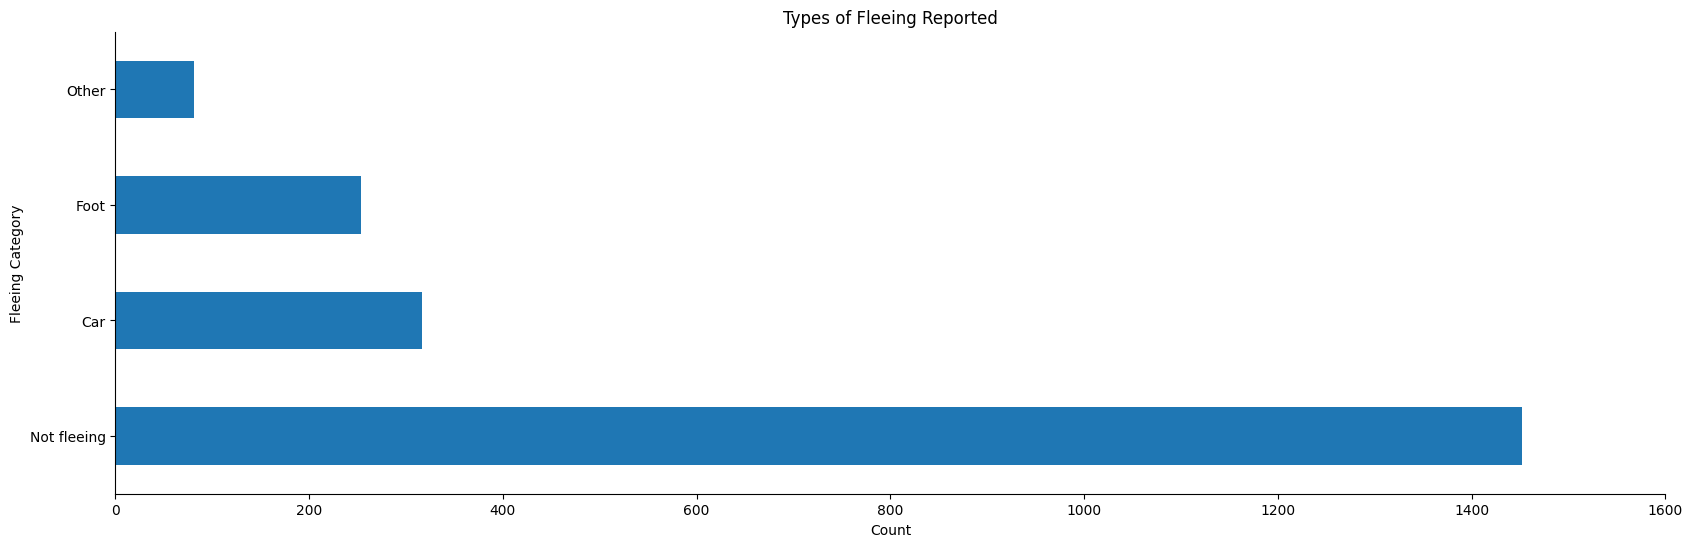

In [46]:
df_f = df.dropna(subset='flee')
df_f.flee.value_counts().plot(kind='barh', xlim=(0,1600),
figsize=(20,6), xlabel='Count', ylabel='Fleeing Category', title='Types of Fleeing Reported')
plt.gca().spines[['top', 'right']].set_visible(False);

## Fleeing and Race

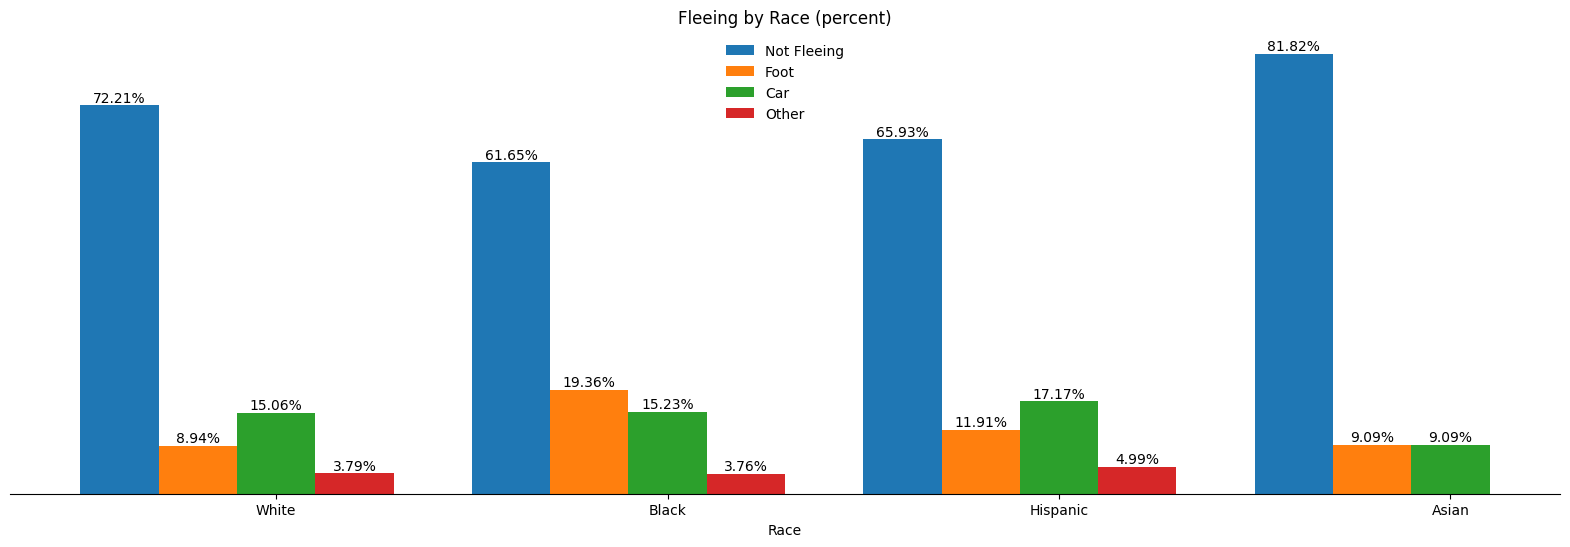

In [60]:
total_flee = (
    df.groupby('race')
    .flee
    .value_counts()
    .groupby(level=0)
    .sum()
             )
flee_race_p = (
    df.groupby('race')
    .flee
    .value_counts()
    .divide(total_flee)
    .multiply(100)
    .round(decimals=2)
            )

fig, ax = plt.subplots(figsize=(20,6))
pos = np.arange(4)
containers = [ax.bar(pos, flee_race_p[:, 'Not fleeing'][['W', 'B', 'H', 'A']], width=0.2, label='Not Fleeing'),
ax.bar(pos + 0.2, flee_race_p[:, 'Foot'][['W', 'B', 'H', 'A']], width=0.2, label='Foot'),
ax.bar(pos + 0.4, flee_race_p[:, 'Car'][['W', 'B', 'H', 'A']], width=0.2, label='Car'),
ax.bar(pos + 0.6, np.append(flee_race_p[:, 'Other'][['W', 'B', 'H']], np.nan), width=0.2, label='Other')]
ax.spines[['top', 'right', 'left']].set_visible(False)
for container in containers:
    ax.bar_label(container, fmt='{}%')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_xticks(pos + 0.4)
ax.set_xticklabels(['White', 'Black', 'Hispanic', 'Asian'])
ax.legend(frameon=False)
ax.set_title('Fleeing by Race (percent)')
ax.set_xlabel('Race');

Nearly 40% of black suspects were fleeing, mostly by foot, upon getting shot.